# Time Series Data

* Time series data adds new manipulation options to our data, and pandas was actually developed with time series data in mind.
* Pandas can handle date/time formats
* See https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [15]:
import numpy as np      #import numpy
import pandas as pd     #import pandas
from datetime import datetime   #import datetime


#timestamp 
np.datetime64('2021-03-01 01:00:00.00', 'ns')   #using numpy and datetime64,   year-month-day  hour:minute:second:milisecond,  parameter ns is nanosecond

#returns datetime with everything up to nanosecond

numpy.datetime64('2021-03-01T01:00:00.000000000')

In [16]:
#specifying dates
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708']) #demonstration of the different formates you can use in to_datetime
dates  #processed into DatetimeIndex

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [17]:
dates.to_period('D')  #getting period index with type being period[D] and now has frequency D which is day

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [18]:
#time duration or time delta

dates - dates[0] #duration between different datetimes

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Resampling 
* the process of converting a time series from one frequency to another.
  * downsampling: going from a high frequency (e.g. daily) to a lower frequency (e.g. weekly)
  * upsampling: going from a lower frequency to higher frequency
  * remapping: aligning data to a set frequency (e.g. mapping weekly data to sundays)
  
Offset aliases: https://pandas.pydata.org/docs/user_guide/timeseries.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We can create date ranges with
#pd.date_range?

In [20]:
# Some sample data

dates = pd.date_range(start='1/1/2018', end='05/31/2018') #creating a date range from 1/1/2018 to 05/31/2018
ts = pd.Series(np.random.randn(len(dates)), index=dates) #creating series and fill in random values from the size of dates and make index the dates
ts.head()

2018-01-01   -1.092922
2018-01-02    0.072707
2018-01-03   -0.208419
2018-01-04    1.432227
2018-01-05   -0.760366
Freq: D, dtype: float64

In [21]:
# You need a date or time index on your dataframe to do some resampling
# When we resample we need to determine the new frequency we want and how we want to resample
# Let's change our daily data down to weekly data

resampler = ts.resample('W') #resamples the daily data to weekly data
resampler

In [22]:
# Just like groupby, this is an object which will do the resampling for us
# Since we are downsampling (D->W) we need to decide how to aggregate our datapoints
# We are now very used to this!

resampler.apply(np.mean).head() #applying mean to the resampler, grouped by weeks and taking the means from within those weeks. Frequency is now Weekly beginning on sunday

2018-01-07   -0.190910
2018-01-14   -0.558483
2018-01-21   -0.008811
2018-01-28   -0.085295
2018-02-04   -0.417715
Freq: W-SUN, dtype: float64

* Notice the frequency is now W-SUN (weekly beginning on sunday)
* When we downsample we are "binning" our values and need to determine which end of the bin is open/closed
* By default the right side is **closed** for weekly binning, which we did here
  * Closed vs. open can be confusing! For example, is an observation at midnight on October 13, 2020 a Tuesday observation, or a Monday observation?
  * If you have defined thing as left closed, then it's Monday. If you defined them as right closed, then it's Tuesday.

# Here's an example
* if you have a bunch of time sampled data in seconds and you are downsampling to minutes then:
  * if you are **left closed** you are saying "downsample to minutes where all of the values are **<** the next minute whole number"
  * if you are **right closed** you are saying "downsample to minutes where all of the values are **<=** the next minute whole number"


In [23]:
# Let's look at 9 seconds which cross the minute boundry
index = pd.date_range('10/13/2020 12:59:55', periods=9, freq='S')  #creating date range from specified date, created 9 periods with the frequency of a second
series = pd.Series(range(9), index=index) #series in range of 9 with index being the data from the variable index
series

2020-10-13 12:59:55    0
2020-10-13 12:59:56    1
2020-10-13 12:59:57    2
2020-10-13 12:59:58    3
2020-10-13 12:59:59    4
2020-10-13 13:00:00    5
2020-10-13 13:00:01    6
2020-10-13 13:00:02    7
2020-10-13 13:00:03    8
Freq: S, dtype: int64

In [24]:
# if we resample this to 1 minute intervals closed on the left 
# then the first five seconds will be binned to the left value (<)

series.resample('1T', closed='left').apply(np.max) #resampling to 1 minute. the first 5 will be binned to the left value and the rest will be binned to the right

2020-10-13 12:59:00    4
2020-10-13 13:00:00    8
Freq: T, dtype: int64

In [25]:
# if we resample this to 1 minute intervals closed on the right 
# then the first six seconds will be binned to the left value (<=)
series.resample('1T', closed='right').apply(np.max)  #resampling to 1 minute

2020-10-13 12:59:00    5
2020-10-13 13:00:00    8
Freq: T, dtype: int64

<a href="https://stackoverflow.com/questions/48340463/how-to-understand-closed-and-label-arguments-in-pandas-resample-method">https://stackoverflow.com/questions/48340463/how-to-understand-closed-and-label-arguments-in-pandas-resample-method</a>
<img src="https://i.stack.imgur.com/nX6yv.png"></img>

In [27]:
# Also, downsampling really is an aggregation exercise, so you can do all sorts of things
# With upsampling there is no need to aggregate. 

# Let's create a dataframe, with two weekly indices, and four columns. First the indicies:
dates = pd.date_range(start = '1/1/2018', periods=2, freq='W')   #creating a datarange with start of 1/1/2018, for a period of 2 by week
# Now let's fill in the dataframe
df = pd.DataFrame(np.random.randn(2,4), index=dates, columns = ['col1', 'col2', 'col3', 'col4']) #random numbers for two rows and four columns, indeces are the two dates and columns are specified asl col1 col2 col3 col4
df.head()

,col1,col2,col3,col4
2018-01-07,0.101515,0.952029,1.450010,1.288441
2018-01-14,-1.098879,0.396655,-0.244184,-0.299999


In [28]:
# Now we upsample from weekly frequency to daily frequency,
df_daily = df.resample('D').asfreq()  #resampling df to days and geting frequencies
df_daily.head() #created different index values with nothing in them

,col1,col2,col3,col4
2018-01-07,0.101515,0.952029,1.45001,1.288441
2018-01-08,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN
2018-01-10,NaN,NaN,NaN,NaN
2018-01-11,NaN,NaN,NaN,NaN


In [29]:
# As you notice, there will be NaN values, let's engage in interpolation
# Forward fill or backward fill
df.resample('D').ffill() #using ffill (which means forward fill) which takes the first row of numbers and fills ahead

,col1,col2,col3,col4
2018-01-07,0.101515,0.952029,1.450010,1.288441
2018-01-08,0.101515,0.952029,1.450010,1.288441
2018-01-09,0.101515,0.952029,1.450010,1.288441
2018-01-10,0.101515,0.952029,1.450010,1.288441
2018-01-11,0.101515,0.952029,1.450010,1.288441
2018-01-12,0.101515,0.952029,1.450010,1.288441
2018-01-13,0.101515,0.952029,1.450010,1.288441
2018-01-14,-1.098879,0.396655,-0.244184,-0.299999


In [30]:
# We can also choose to only fill a certain number of periods, by using the limit 
# parameter in the ffill() function. For instance, here, we are limiting to 
# interpolating three observations
df.resample('D').bfill(limit=3)   #using bfill (which means backwards fill) which takes the numbers at 1/14 and fills backwards 3 rows

,col1,col2,col3,col4
2018-01-07,0.101515,0.952029,1.450010,1.288441
2018-01-08,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN
2018-01-10,NaN,NaN,NaN,NaN
2018-01-11,-1.098879,0.396655,-0.244184,-0.299999
2018-01-12,-1.098879,0.396655,-0.244184,-0.299999
2018-01-13,-1.098879,0.396655,-0.244184,-0.299999
2018-01-14,-1.098879,0.396655,-0.244184,-0.299999


# Working with time series data
* We've now seen downsampling and upsampling, and have a better sense of how date ranges are handled in pandas
* Let's go back to a favorite dataset of ours which has lots of interesting time series data in it and try and explore a bit

In [31]:
df=pd.read_excel("datasets/AnnArbor-TicketViolation2016.xls",skiprows=1)  #loading in ann arbor ticket 2016 data
print(df.columns)  #getting the column names
print(df.dtypes) #getting the types

Index(['Ticket #', 'Badge', 'Issue Date ', 'IssueTime', 'Plate', 'State',
       'Make', 'Model', 'Violation', ' Description', 'Location', 'Meter',
       ' Fine ', 'Penalty'],
      dtype='object')
Ticket #                object
Badge                    int64
Issue Date      datetime64[ns]
IssueTime                int64
Plate                   object
State                   object
Make                    object
Model                   object
Violation               object
 Description            object
Location                object
Meter                   object
 Fine                    int64
Penalty                  int64
dtype: object


In [32]:
df['Issue Date '] = df['Issue Date '].astype(str)  #taking Issue Date values and casting them to strings

In [33]:
df.head()

,Ticket #,Badge,Issue Date,IssueTime,Plate,State,Make,Model,Violation,Description,Location,Meter,Fine,Penalty
0,2060009973,827,2016-01-02,1111,A27VT,MI,SATU,NaN,A01,EXPIRED METER,LOT 11,5A,20,0
1,2060009996,827,2016-01-02,1304,DCZ5024,MI,HOND,NaN,A04,NO PRKNG ANYTME,200 BLK OF STATE SOU,NaN,25,0
2,2060009995,827,2016-01-02,1302,BEJ2048,MI,FORD,NaN,A01,EXPIRED METER,900 BLK OF WASHINGTO,5066B,20,0
3,2060009994,827,2016-01-02,1257,DKQ9157,MI,FORD,NaN,A01,EXPIRED METER,300 BLK OF THAYER SO,5088,10,0
4,2060009993,827,2016-01-02,1254,GJR3356,OH,CHEV,NaN,A01,EXPIRED METER,700 BLK OF WASHINGTO,5046,20,50


In [36]:
# First up, let's create a date/time index. We have an issue date column and 
# an issuetime column
def clean_time(x):
    issue_time = str(x['IssueTime']) #variable issue_time takes data from row in Issue time and cast to string
    if len(issue_time) < 4: #if length of string is less than 4
        issue_time = '0' + issue_time  #issue time adds a 0 to the front of the number   ex. 234 now becomes 0234
        
    date_time = '{} {}:{}'.format(x['Issue Date '],     #recreating the variable date time with the Issue Date number followed by the first two numbers in the issue_time for hour followed by : followed by the last two numbers for minutes
                                   issue_time[0:2],
                                  issue_time[-2:], axis=1)
    return pd.to_datetime(date_time, format='%Y-%m-%d %H:%M')  #turning to datetime wit te variable date_time and in the format year month day hour minute

df=df.set_index(df[["Issue Date ","IssueTime"]].apply(clean_time, axis=1))  #grabbing issue date and issuetime and applying function clean_time. set_index to results
df.head()

,Ticket #,Badge,Issue Date,IssueTime,Plate,State,Make,Model,Violation,Description,Location,Meter,Fine,Penalty
2016-01-02 11:11:00,2060009973,827,2016-01-02,1111,A27VT,MI,SATU,NaN,A01,EXPIRED METER,LOT 11,5A,20,0
2016-01-02 13:04:00,2060009996,827,2016-01-02,1304,DCZ5024,MI,HOND,NaN,A04,NO PRKNG ANYTME,200 BLK OF STATE SOU,NaN,25,0
2016-01-02 13:02:00,2060009995,827,2016-01-02,1302,BEJ2048,MI,FORD,NaN,A01,EXPIRED METER,900 BLK OF WASHINGTO,5066B,20,0
2016-01-02 12:57:00,2060009994,827,2016-01-02,1257,DKQ9157,MI,FORD,NaN,A01,EXPIRED METER,300 BLK OF THAYER SO,5088,10,0
2016-01-02 12:54:00,2060009993,827,2016-01-02,1254,GJR3356,OH,CHEV,NaN,A01,EXPIRED METER,700 BLK OF WASHINGTO,5046,20,50


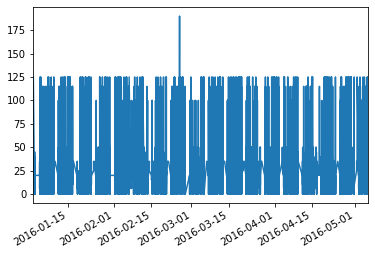

In [37]:
%matplotlib inline
# Now let's plot the fines over the year!
import matplotlib.pyplot as plt
df[' Fine '].plot()   #ploting the column Fine from df

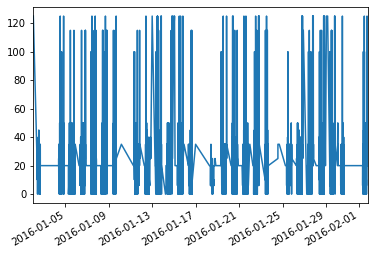

In [38]:
# That's meaningless... How would we find signal in that noise?
# Let's zoom in on a single month, pandas does the "right thing" with date/time slicing!
df.loc['2016-01-01':'2016-02-1', ' Fine '].plot()   #grabbing entries between the dates from Fine and plotting it

In [39]:
# This, is, btw, much cooler than it seems at first; check this out
df.index < '2016-01-03'   #mask

array([ True,  True,  True, ..., False, False, False])

In [40]:
# so this means we can use date/times as masks!
df[df.index < '2016-02'].tail()   #grab everything less than 2016-02 and return the last few rows

,Ticket #,Badge,Issue Date,IssueTime,Plate,State,Make,Model,Violation,Description,Location,Meter,Fine,Penalty
2016-01-30 12:21:00,2020026321,860,2016-01-30,1221,252VS8,MA,MAZD,NaN,A01,EXPIRED METER,700 BLK OF MONROE,4087B,10,0
2016-01-30 12:43:00,2020026326,860,2016-01-30,1243,952NCO,MA,HOND,NaN,A01,EXPIRED METER,300 BLK OF OBSERVATO,5075B,10,0
2016-01-30 02:09:00,H000213719,333,2016-01-30,209,DBM9613,MI,FORD,NaN,A04,NO PRKNG ANYTME,600 CHURCH ST,NaN,35,20
2016-01-30 12:54:00,3080009514,264,2016-01-30,1254,EC11AK,OH,HOND,NaN,M01,EXPIRED METER,NC27 LOT,4,6,0
2016-01-30 09:19:00,3080009466,264,2016-01-30,919,DJU3427,MI,BUIC,NaN,M30,NO PERMITS U/M,S8 LOT,NaN,20,0


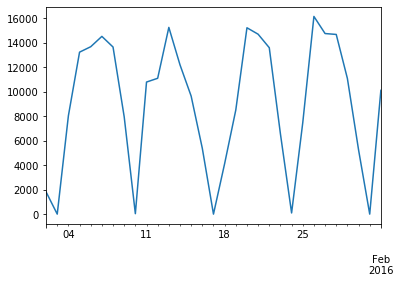

In [41]:
# Now let's resample this and look at daily totals
df.loc['2016-01-01':'2016-02-01', ' Fine '].resample('1D').apply(np.sum).plot()     #indeces between the two dates and gets info from fines, resample by day and apply sum of all ticket fines per day and plot

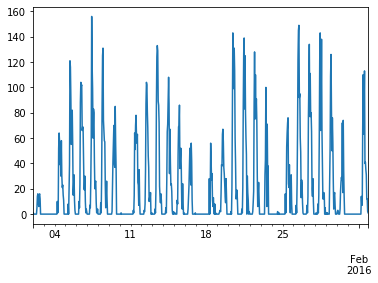

In [42]:
# January 10th 2016 was a sunday! Looks pretty clear that sundays very few tickets are given out!
#We could also look at tickets per hour in a single week
df.loc['2016-01-01':'2016-02-01', ' Fine '].resample('1H').apply(len).plot() #indeces between the two dates and gets info from fines, resample by hour and apply len for how many tickets per hour and plot

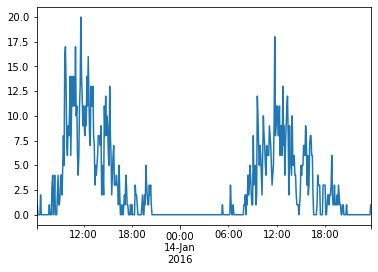

In [45]:
# That 13th-14th has some big values, let's zoom in a bit
df.loc['2016-01-13':'2016-01-14', ' Fine '].resample('5T').apply(len).plot() #indeces between the two days and get info from fines, resample by 5 minutes and apply len to get number of tickets to see how many tickets every 5 minutes and plot

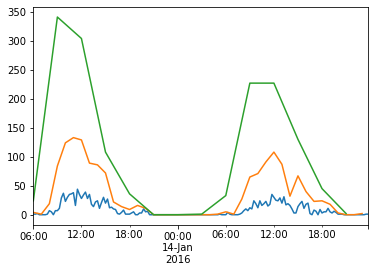

In [46]:
# We can also explore multiple series of data plotted on the same chart by executing plot() on a
# dataframe multiple times in a single cell
df.loc["2016-01-13":"2016-01-14", " Fine "].resample("15T").apply(len).plot()   
df.loc["2016-01-13":"2016-01-14", " Fine "].resample("60T").apply(len).plot()
df.loc["2016-01-13":"2016-01-14", " Fine "].resample("180T").apply(len).plot()